In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df1 = pd.read_csv('data/국토교통부_교량_20220627_정제.csv')
df2 = pd.read_csv('data/교량_통합_정제_2.csv')

In [4]:
# 범주형 변수 타입 변환

df1['시설물종별등급구분'] = df1['시설물종별등급구분'].astype('category')
df1['상부구조형식'] = df1['상부구조형식'].astype('category')
df1['최종안전점검결과'] = df1['최종안전점검결과'].astype('category')
df1['설계활하중'] = df1['설계활하중'].astype('category')
df2['최종안전점검결과'] = df2['최종안전점검결과'].astype('category')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   교량명        5993 non-null   object  
 1   시설물종별등급구분  5993 non-null   category
 2   시도명        5993 non-null   object  
 3   시군구명       5993 non-null   object  
 4   교량시작점위도    5993 non-null   float64 
 5   교량시작점경도    5993 non-null   float64 
 6   교량종료점위도    5993 non-null   float64 
 7   교량종료점경도    5993 non-null   float64 
 8   교량연장       5993 non-null   float64 
 9   교량폭        5993 non-null   float64 
 10  차로수        5993 non-null   int64   
 11  상부구조형식     5993 non-null   category
 12  최종안전점검결과   5993 non-null   category
 13  설계활하중      5993 non-null   category
 14  준공후경과년수    5993 non-null   int64   
dtypes: category(4), float64(6), int64(2), object(3)
memory usage: 539.9+ KB


In [6]:
df1.describe()

,교량시작점위도,교량시작점경도,교량종료점위도,교량종료점경도,교량연장,교량폭,차로수,준공후경과년수
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000
mean,37.417352,127.016104,37.417511,127.016288,118.059770,16.706808,3.071417,20.594026
std,1.001837,3.291857,1.001852,3.291867,261.703972,9.852839,1.716635,10.789041
min,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000
25%,37.254377,126.898028,37.254444,126.898350,25.200000,10.000000,2.000000,12.000000
50%,37.403253,127.079622,37.403536,127.079997,46.600000,14.700000,2.000000,21.000000
75%,37.639349,127.248739,37.639334,127.249122,120.000000,20.900000,4.000000,28.000000
max,38.214736,127.787583,38.215452,127.787775,8298.000000,145.000000,15.000000,86.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   교량명        5680 non-null   object  
 1   시설물종별등급구분  5680 non-null   object  
 2   교량연장       5680 non-null   float64 
 3   교량폭        5680 non-null   float64 
 4   차로수        5680 non-null   int64   
 5   상부구조형식     5680 non-null   object  
 6   최종안전점검결과   5680 non-null   category
 7   설계활하중      5680 non-null   object  
 8   준공후경과년수    5680 non-null   int64   
 9   경간수        5680 non-null   float64 
 10  최대경간장      5680 non-null   float64 
 11  교통량        5680 non-null   float64 
dtypes: category(1), float64(5), int64(2), object(4)
memory usage: 494.0+ KB


In [8]:
df2.describe()

,교량연장,교량폭,차로수,준공후경과년수,경간수,최대경간장,교통량
count,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000
mean,121.043574,16.850687,3.104049,20.442254,3.604577,30.980387,35750.182570
std,267.731119,9.761214,1.714296,10.695163,5.759607,21.559406,28037.973636
min,3.000000,2.000000,0.000000,2.000000,1.000000,1.800000,262.000000
25%,25.500000,10.200000,2.000000,12.000000,1.000000,15.000000,12956.000000
50%,48.000000,15.000000,3.000000,21.000000,2.000000,30.000000,33402.000000
75%,120.700000,20.900000,4.000000,28.000000,4.000000,45.000000,48523.000000
max,8298.000000,145.000000,15.000000,86.000000,188.000000,476.000000,216980.000000


## 시설물종별등급구분과 최종안전점검결과 간 관계

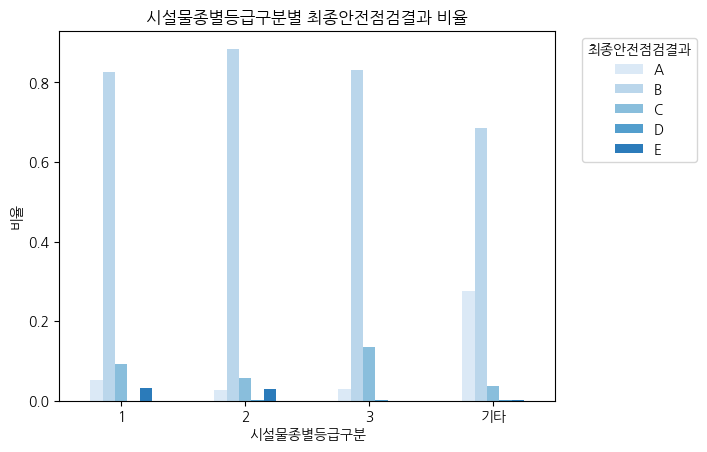

In [9]:
# 막대그래프

result = df1.groupby(['시설물종별등급구분', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)

sns.set_palette("Blues")
result_ratios.plot(kind='bar', stacked=False)
plt.title('시설물종별등급구분별 최종안전점검결과 비율')
plt.xlabel('시설물종별등급구분')
plt.ylabel('비율')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.show()

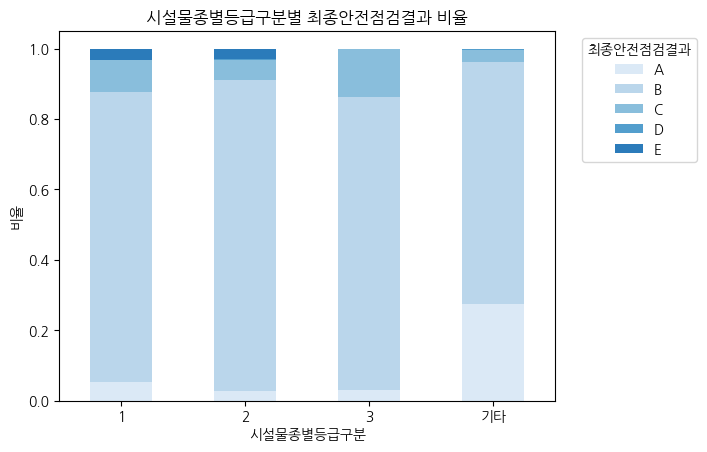

In [10]:
# 막대그래프(stacked)

result = df1.groupby(['시설물종별등급구분', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)

sns.set_palette("Blues")
result_ratios.plot(kind='bar', stacked=True)
plt.title('시설물종별등급구분별 최종안전점검결과 비율')
plt.xlabel('시설물종별등급구분')
plt.ylabel('비율')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.show()

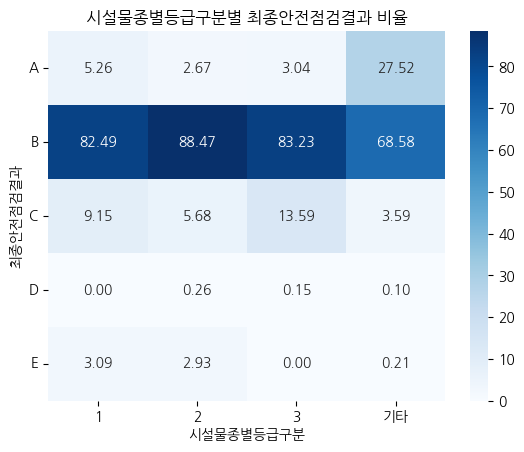

In [11]:
# 히트맵

cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['시설물종별등급구분'], normalize='columns') * 100

sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.yticks(rotation=0)
plt.title("시설물종별등급구분별 최종안전점검결과 비율")
plt.show()

## 교량연장과 최종안전점검결과 간 관계

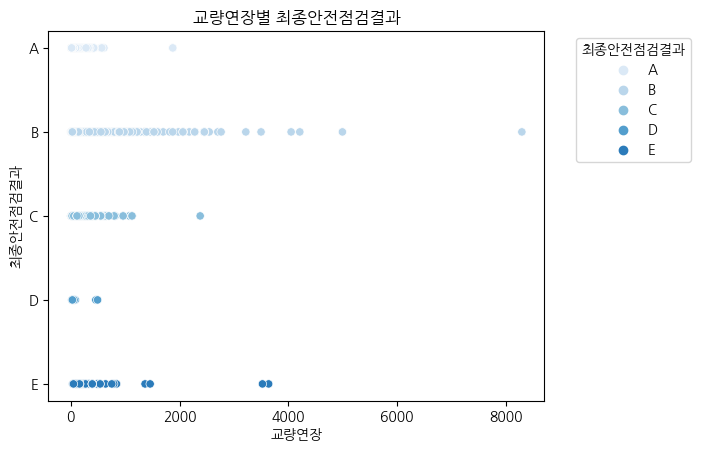

In [43]:
# 산점도

sns.scatterplot(x='교량연장', y='최종안전점검결과', hue='최종안전점검결과', data=df1)
plt.title('교량연장별 최종안전점검결과')
plt.xlabel('교량연장')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.05, 1))
plt.show()

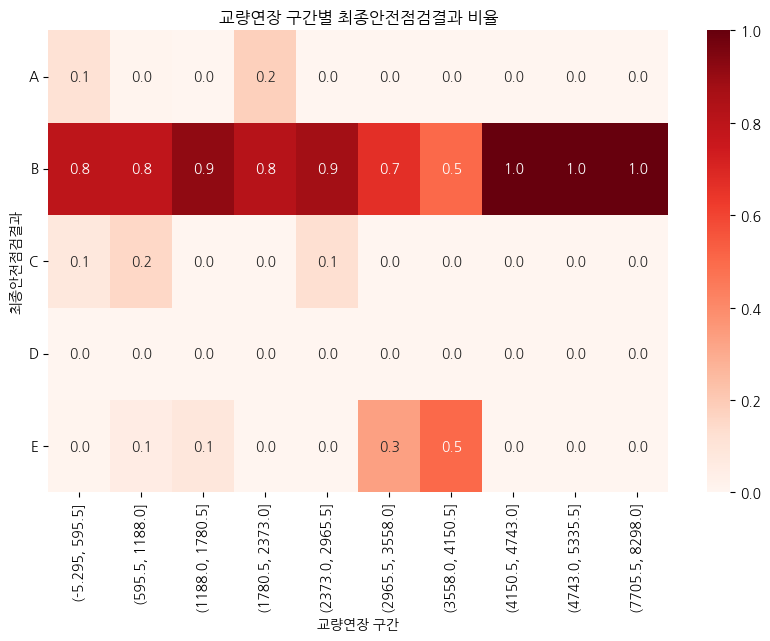

In [13]:
# 히트맵
# cut 함수 : 각 구간의 범위가 모두 동일하도록 구간 분할

df1['교량연장구간'] = pd.cut(df1['교량연장'], bins=14)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['교량연장구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='.1f')
plt.title('교량연장 구간별 최종안전점검결과 비율')
plt.xlabel('교량연장 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

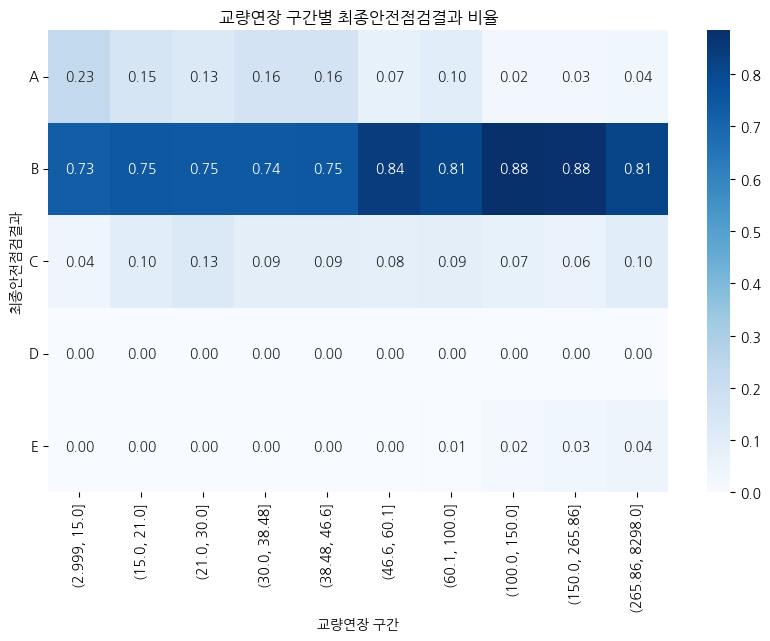

In [14]:
# 히트맵
# qcut 함수 : 분위수를 기준으로 구간 분할
# 각 구간은 균등한 데이터 개수를 갖고있음

df1['교량연장구간'] = pd.qcut(df1['교량연장'], q=10)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['교량연장구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('교량연장 구간별 최종안전점검결과 비율')
plt.xlabel('교량연장 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

## 교량폭과 최종안전점검결과 간 관계

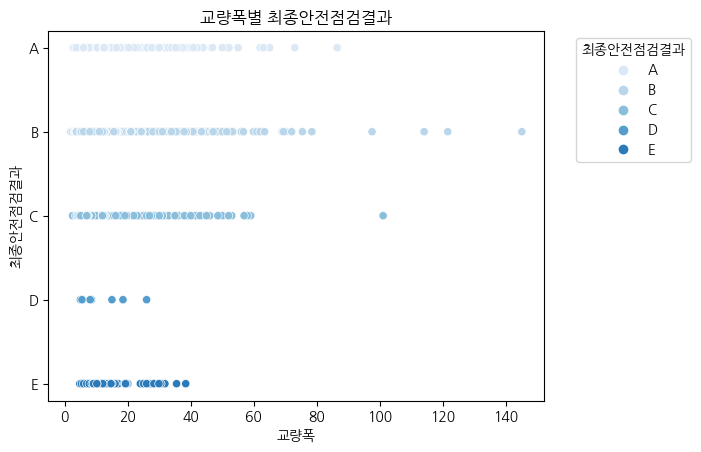

In [15]:
# 산점도

sns.scatterplot(x='교량폭', y='최종안전점검결과', hue='최종안전점검결과', data=df1)
plt.title('교량폭별 최종안전점검결과')
plt.xlabel('교량폭')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.05, 1))
plt.show()

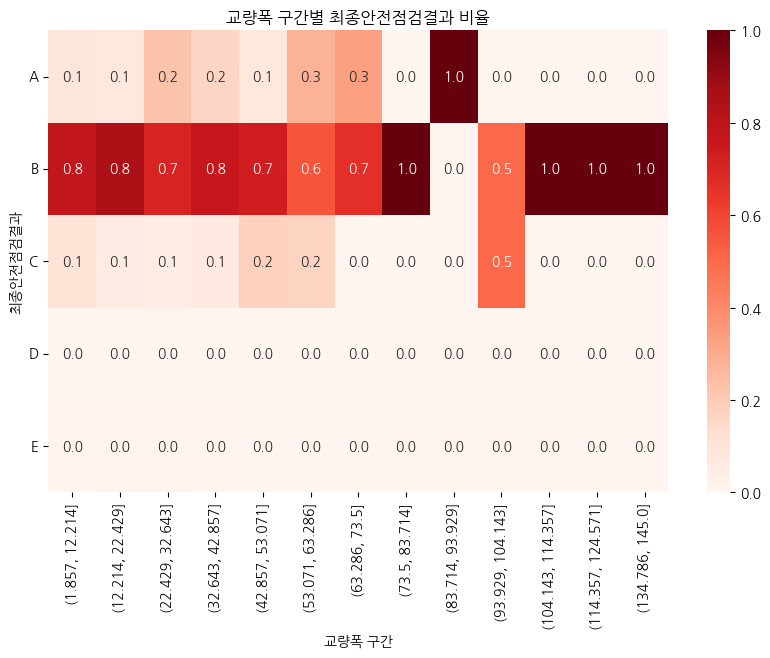

In [16]:
# 히트맵
# cut 함수 : 각 구간의 범위가 모두 동일하도록 구간 분할

df1['교량폭구간'] = pd.cut(df1['교량폭'], bins=14)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['교량폭구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='.1f')
plt.title('교량폭 구간별 최종안전점검결과 비율')
plt.xlabel('교량폭 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

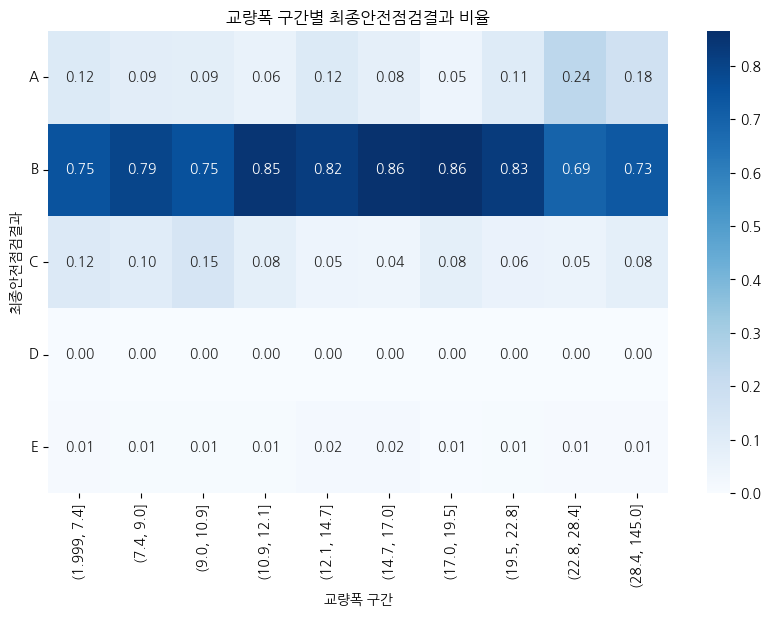

In [17]:
# 히트맵
# qcut 함수 : 분위수를 기준으로 구간 분할
# 각 구간은 균등한 데이터 개수를 갖고있음

df1['교량폭구간'] = pd.qcut(df1['교량폭'], q=10)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['교량폭구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('교량폭 구간별 최종안전점검결과 비율')
plt.xlabel('교량폭 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

## 차로수와 최종안전점검결과 간 관계

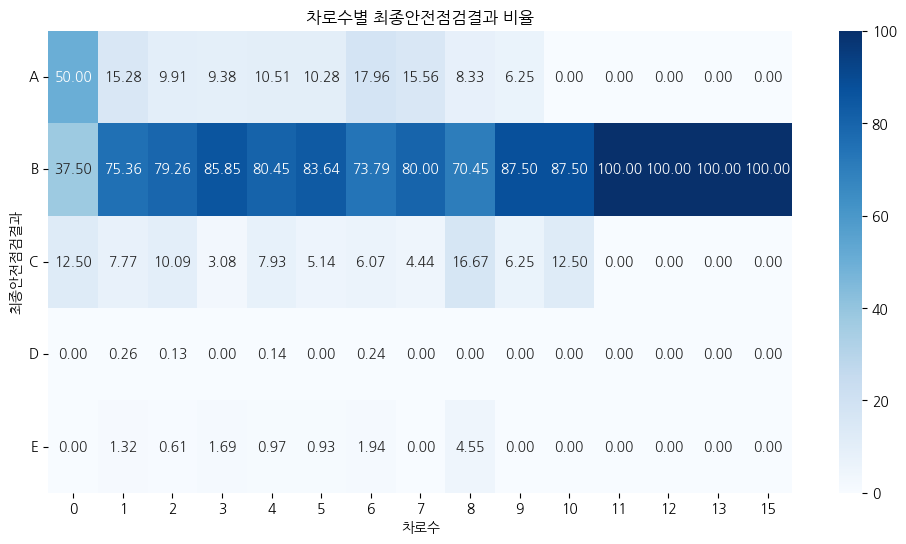

In [18]:
# 히트맵

cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['차로수'], normalize='columns') * 100

plt.figure(figsize=(12, 6)) 
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.yticks(rotation=0)
plt.title("차로수별 최종안전점검결과 비율")
plt.show()

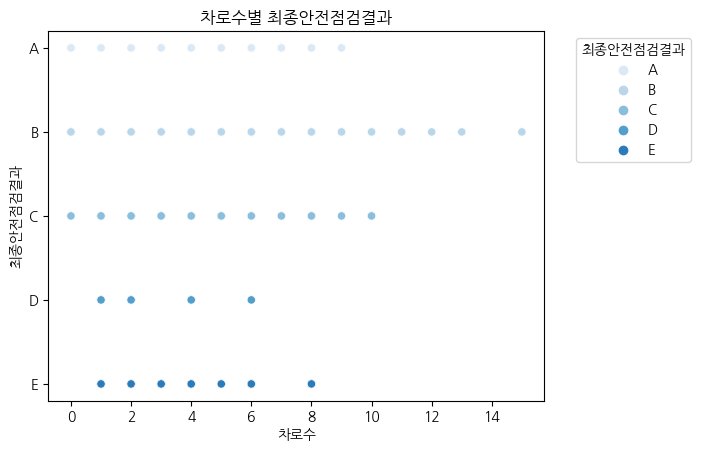

In [19]:
# 산점도

sns.scatterplot(x='차로수', y='최종안전점검결과', hue='최종안전점검결과', data=df1)
plt.title('차로수별 최종안전점검결과')
plt.xlabel('차로수')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.05, 1))
plt.show()

## 상부구조형식과 최종안전점검결과 간 관계

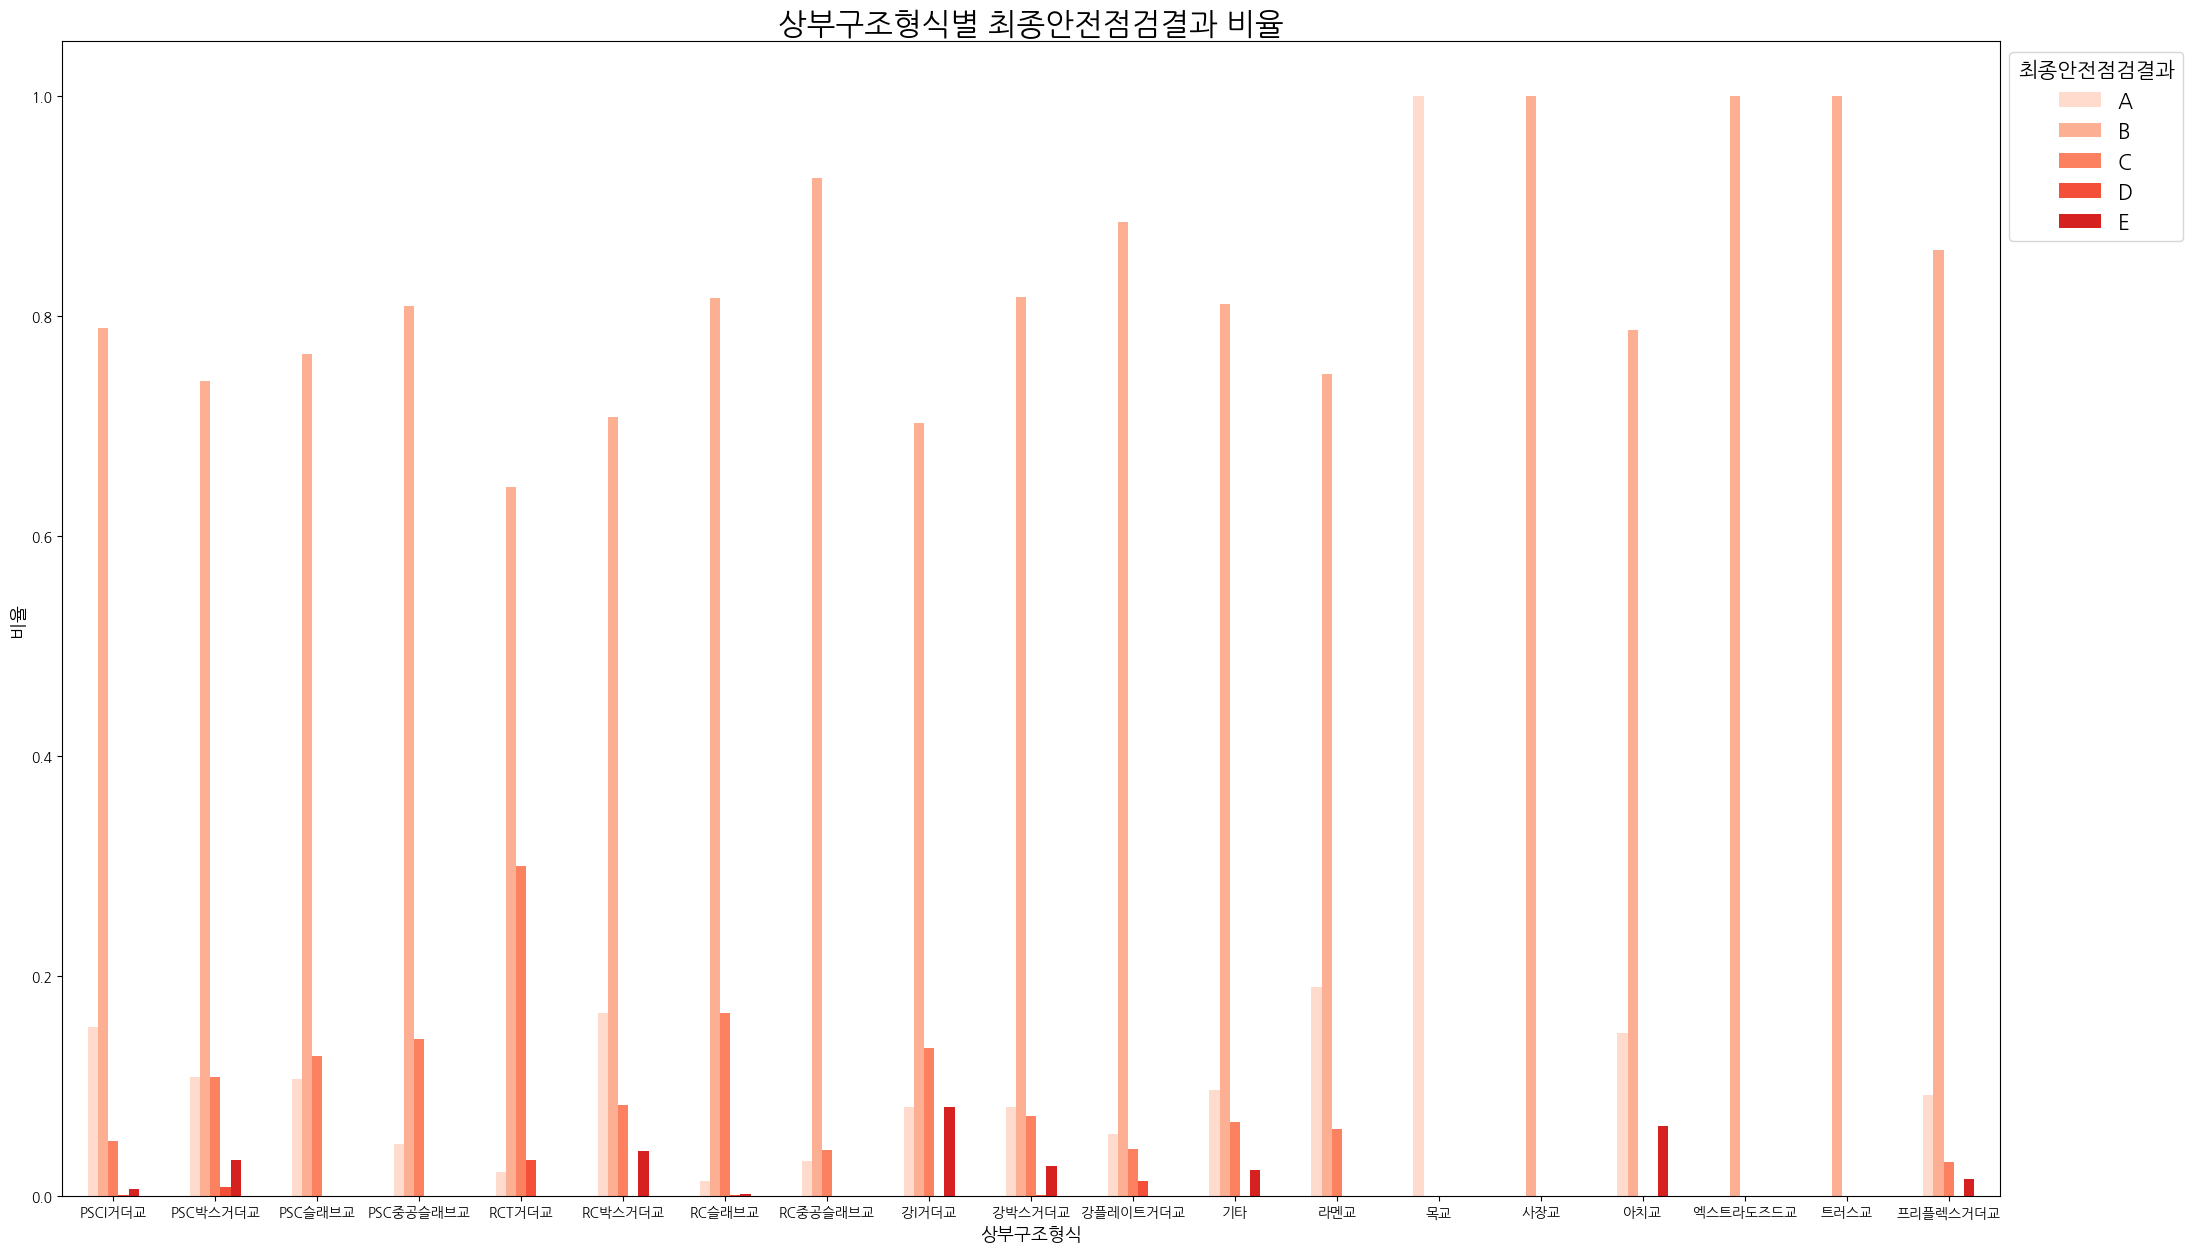

In [20]:
# 막대그래프

result = df1.groupby(['상부구조형식', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)

sns.set_palette("Reds")
fig, ax = plt.subplots(figsize=(25, 15))
result_ratios.plot(kind='bar', stacked=False, ax=ax)
plt.title('상부구조형식별 최종안전점검결과 비율', fontsize=22)
plt.xlabel('상부구조형식', fontsize=13)
plt.ylabel('비율', fontsize=13)
plt.legend(title='최종안전점검결과', title_fontsize='15', fontsize=15, bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=0)
plt.show()

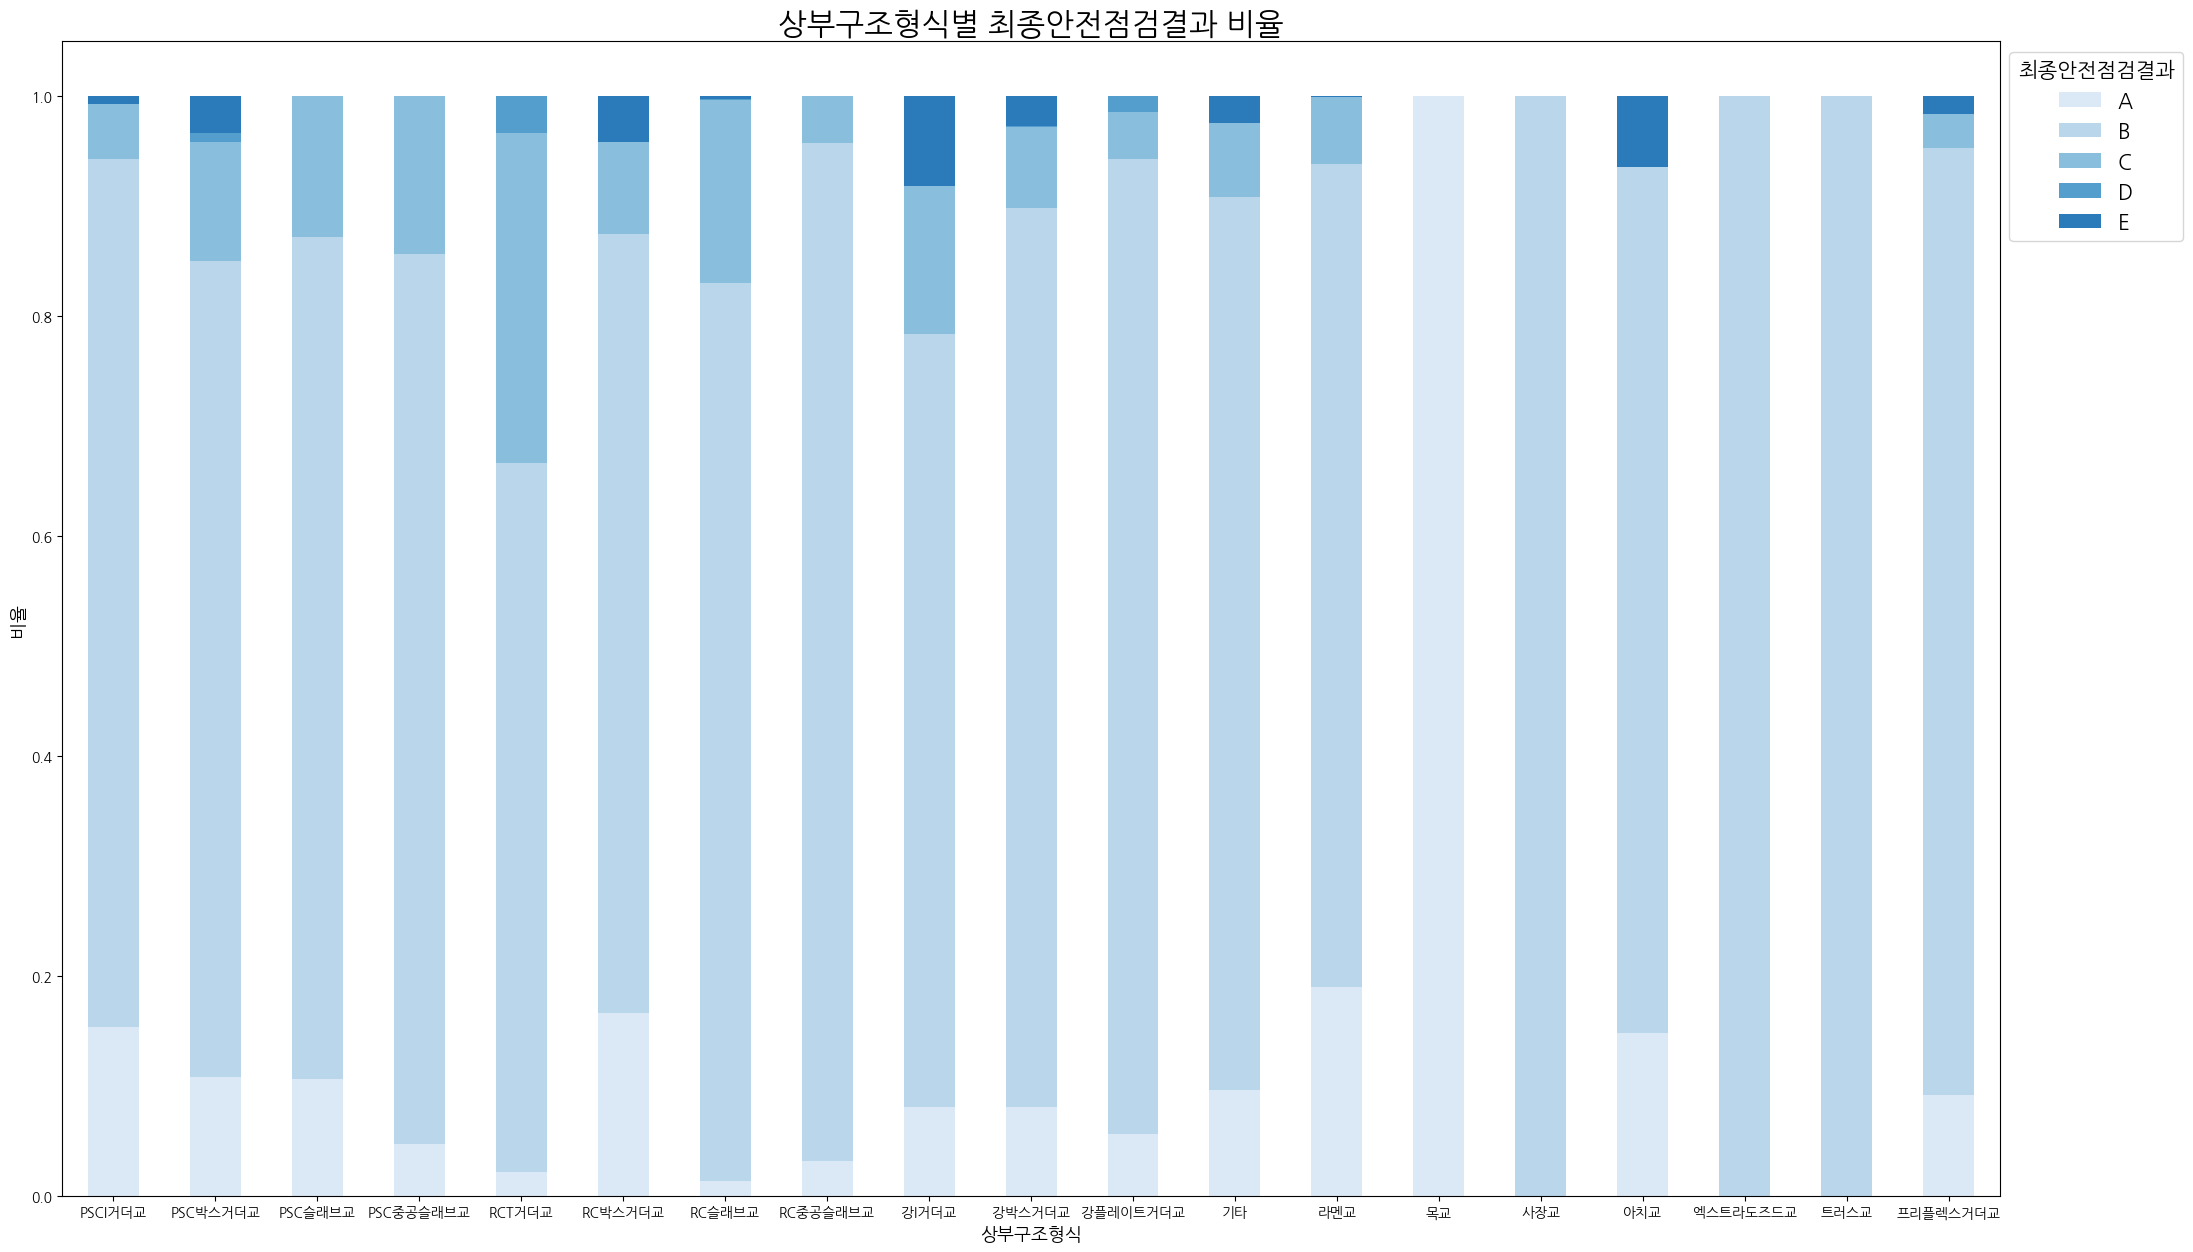

In [21]:
# 막대그래프(stacked)

result = df1.groupby(['상부구조형식', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)

sns.set_palette("Blues")
fig, ax = plt.subplots(figsize=(25, 15))
result_ratios.plot(kind='bar', stacked=True, ax=ax)
plt.title('상부구조형식별 최종안전점검결과 비율', fontsize=22)
plt.xlabel('상부구조형식', fontsize=13)
plt.ylabel('비율', fontsize=13)
plt.legend(title='최종안전점검결과', title_fontsize='15', fontsize=15, bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=0)
plt.show()

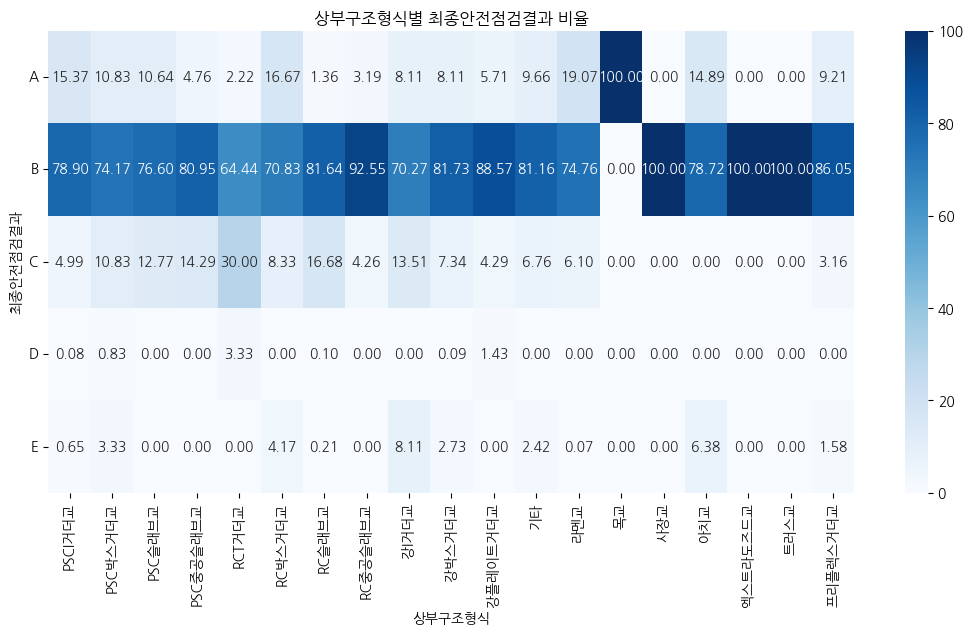

In [22]:
# 히트맵

cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['상부구조형식'], normalize='columns') * 100

plt.figure(figsize=(13, 6)) 
ax = sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.yticks(rotation=0)
plt.title("상부구조형식별 최종안전점검결과 비율")
plt.show()

## 설계활하중과 최종안전점검결과 간 관계

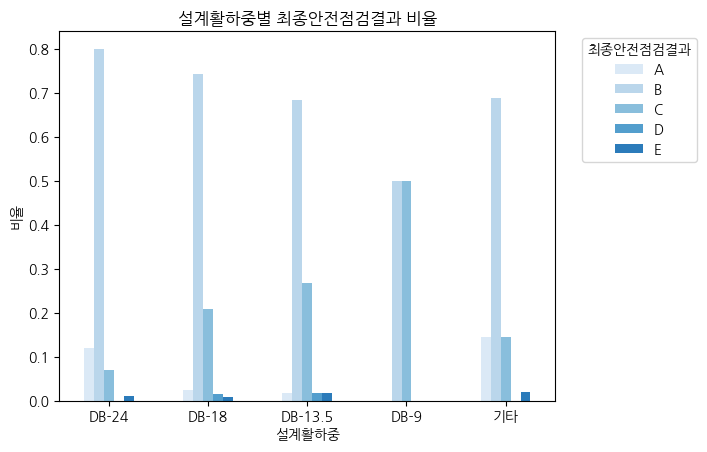

In [23]:
# 막대그래프

result = df1.groupby(['설계활하중', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)
desired_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타']  
result_ratios = result_ratios.loc[desired_order]

sns.set_palette("Blues")
result_ratios.plot(kind='bar', stacked=False)
plt.title('설계활하중별 최종안전점검결과 비율')
plt.xlabel('설계활하중')
plt.ylabel('비율')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.show()

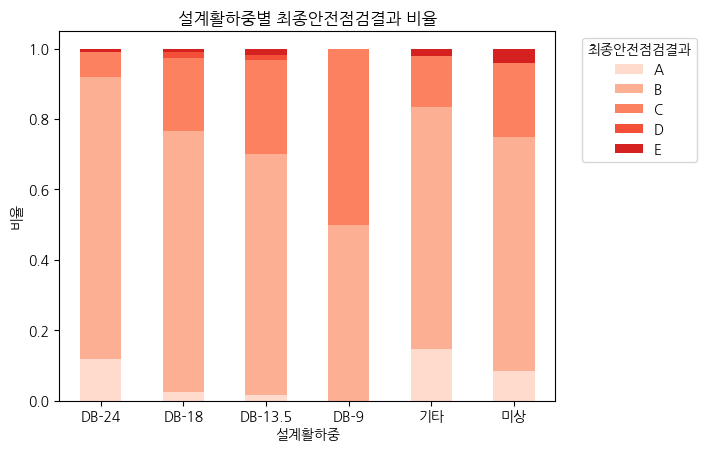

In [24]:
# 막대그래프(stacked)

result = df1.groupby(['설계활하중', '최종안전점검결과']).size().unstack()
result_ratios = result.div(result.sum(axis=1), axis=0)
desired_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타', '미상']  
result_ratios = result_ratios.loc[desired_order]

sns.set_palette("Reds")
result_ratios.plot(kind='bar', stacked=True)
plt.title('설계활하중별 최종안전점검결과 비율')
plt.xlabel('설계활하중')
plt.ylabel('비율')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.show()

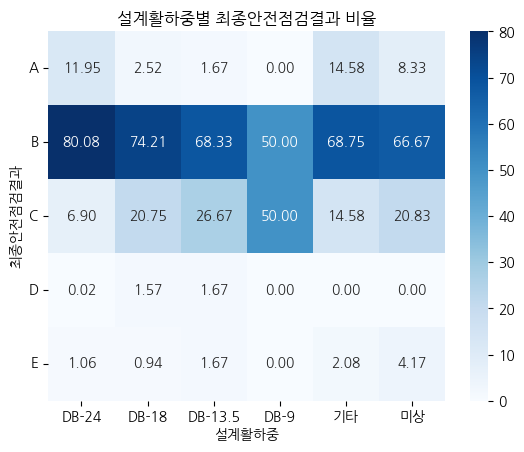

In [25]:
# 히트맵

cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['설계활하중'], normalize='columns') * 100
desired_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타', '미상']  
cross_tab = cross_tab[desired_order]

sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.yticks(rotation=0)
plt.title("설계활하중별 최종안전점검결과 비율")
plt.show()

## 준공후경과년수와 최종안전점검결과 간 관계

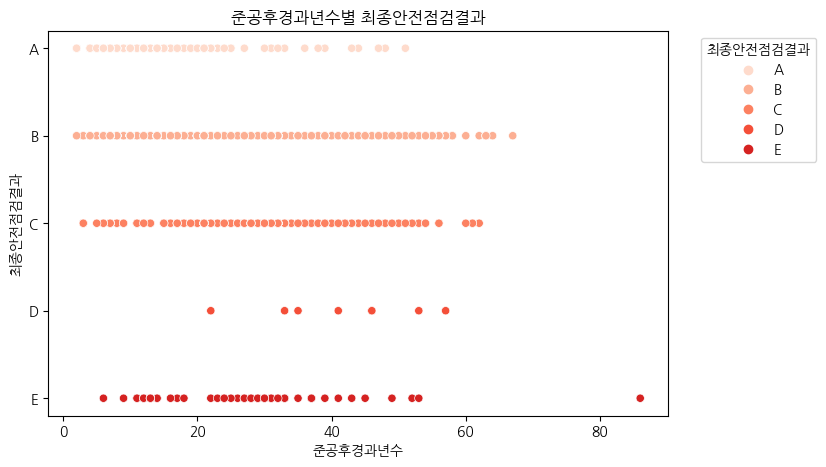

In [26]:
# 산점도

plt.figure(figsize=(8, 5))
sns.scatterplot(x='준공후경과년수', y='최종안전점검결과', hue='최종안전점검결과', data=df1)
plt.title('준공후경과년수별 최종안전점검결과')
plt.xlabel('준공후경과년수')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.25, 1))
plt.show()

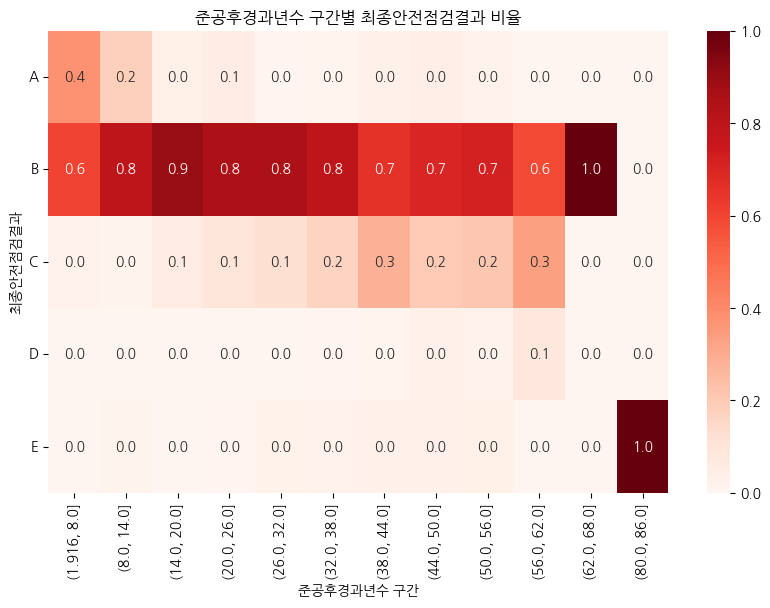

In [27]:
# 히트맵
# cut 함수 : 각 구간의 범위가 모두 동일하도록 구간 분할

df1['준공후경과년수구간'] = pd.cut(df1['준공후경과년수'], bins=14)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['준공후경과년수구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='.1f')
plt.title('준공후경과년수 구간별 최종안전점검결과 비율')
plt.xlabel('준공후경과년수 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

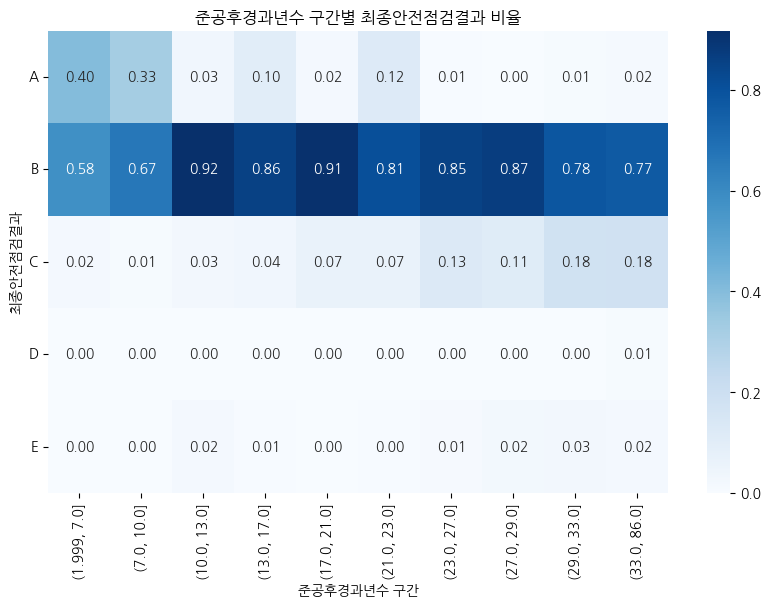

In [28]:
# 히트맵
# qcut 함수 : 분위수를 기준으로 구간 분할
# 각 구간은 균등한 데이터 개수를 갖고있음

df1['준공후경과년수구간'] = pd.qcut(df1['준공후경과년수'], q=10)
cross_tab = pd.crosstab(df1['최종안전점검결과'], df1['준공후경과년수구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('준공후경과년수 구간별 최종안전점검결과 비율')
plt.xlabel('준공후경과년수 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

## 경간수와 최종안전점검결과 간 관계

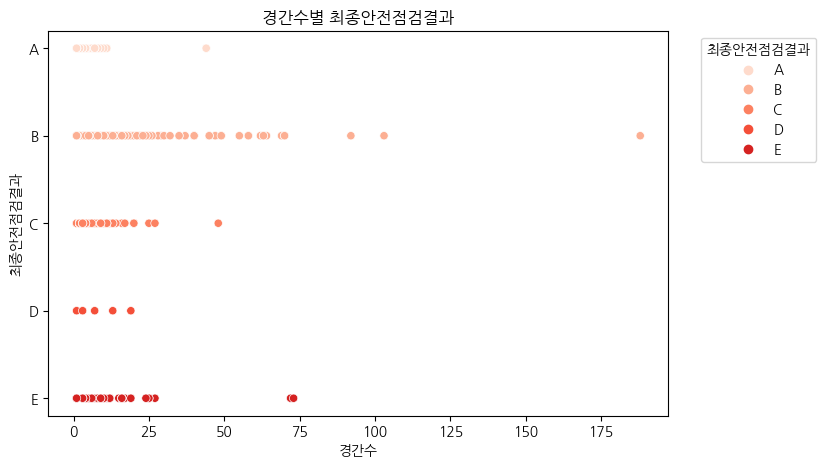

In [29]:
# 산점도

plt.figure(figsize=(8, 5))
sns.scatterplot(x='경간수', y='최종안전점검결과', hue='최종안전점검결과', data=df2)
plt.title('경간수별 최종안전점검결과')
plt.xlabel('경간수')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.25, 1))
plt.show()

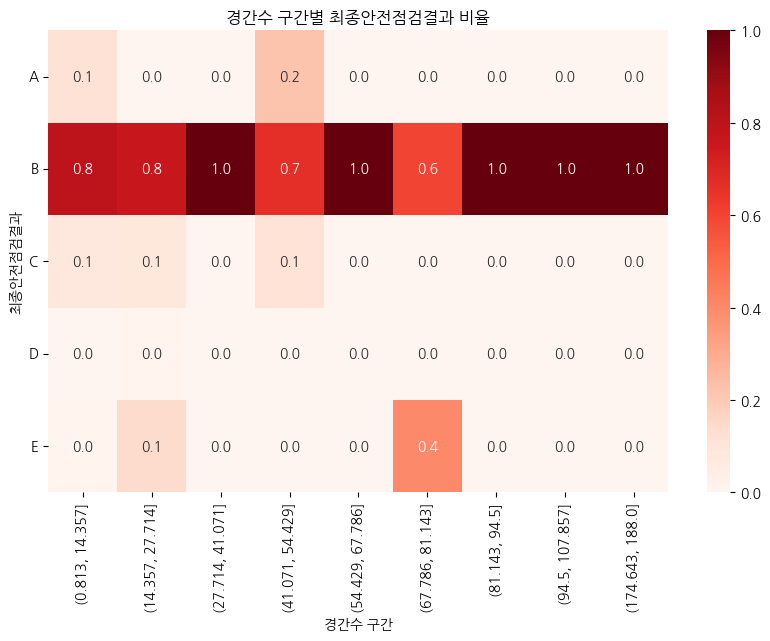

In [30]:
# 히트맵
# cut 함수 : 각 구간의 범위가 모두 동일하도록 구간 분할

df2['경간수구간'] = pd.cut(df2['경간수'], bins=14)
cross_tab = pd.crosstab(df2['최종안전점검결과'], df2['경간수구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='.1f')
plt.title('경간수 구간별 최종안전점검결과 비율')
plt.xlabel('경간수 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

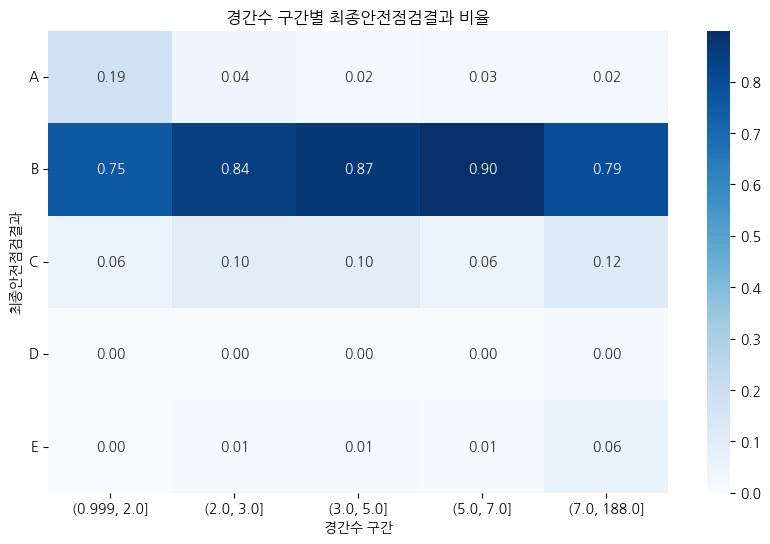

In [31]:
# 히트맵
# qcut 함수 : 분위수를 기준으로 구간 분할
# 각 구간은 균등한 데이터 개수를 갖고있음

df2['경간수구간'] = pd.qcut(df2['경간수'], q=10, duplicates='drop')
cross_tab = pd.crosstab(df2['최종안전점검결과'], df2['경간수구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('경간수 구간별 최종안전점검결과 비율')
plt.xlabel('경간수 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

## 최대경간장과 최종안전점검결과 간 관계

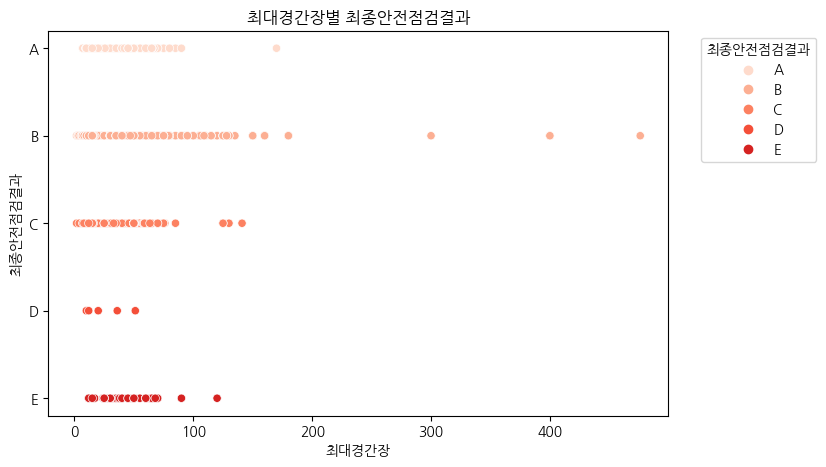

In [32]:
# 산점도

plt.figure(figsize=(8, 5))
sns.scatterplot(x='최대경간장', y='최종안전점검결과', hue='최종안전점검결과', data=df2)
plt.title('최대경간장별 최종안전점검결과')
plt.xlabel('최대경간장')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.25, 1))
plt.show()

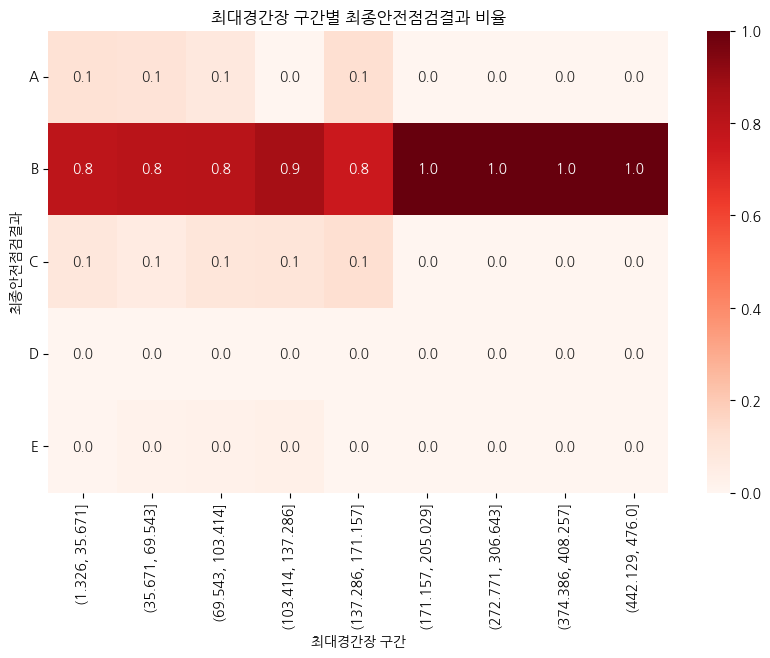

In [33]:
# 히트맵
# cut 함수 : 각 구간의 범위가 모두 동일하도록 구간 분할

df2['최대경간장구간'] = pd.cut(df2['최대경간장'], bins=14)
cross_tab = pd.crosstab(df2['최종안전점검결과'], df2['최대경간장구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='.1f')
plt.title('최대경간장 구간별 최종안전점검결과 비율')
plt.xlabel('최대경간장 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

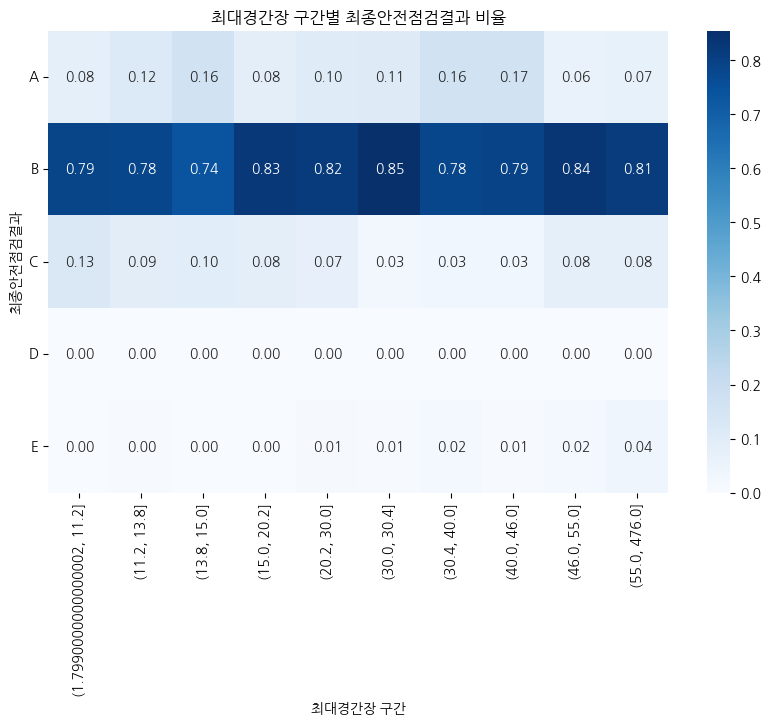

In [34]:
# 히트맵
# qcut 함수 : 분위수를 기준으로 구간 분할
# 각 구간은 균등한 데이터 개수를 갖고있음

df2['최대경간장구간'] = pd.qcut(df2['최대경간장'], q=10)
cross_tab = pd.crosstab(df2['최종안전점검결과'], df2['최대경간장구간'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('최대경간장 구간별 최종안전점검결과 비율')
plt.xlabel('최대경간장 구간')
plt.ylabel('최종안전점검결과')
plt.yticks(rotation=0)
plt.show()

## 교통량과 최종안전점검결과 간 관계

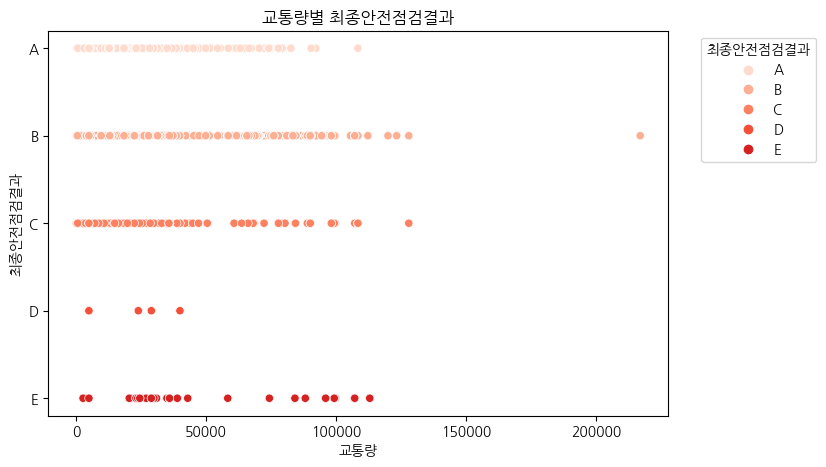

In [35]:
# 산점도

plt.figure(figsize=(8, 5))
sns.scatterplot(x='교통량', y='최종안전점검결과', hue='최종안전점검결과', data=df2)
plt.title('교통량별 최종안전점검결과')
plt.xlabel('교통량')
plt.ylabel('최종안전점검결과')
plt.legend(title='최종안전점검결과', title_fontsize='10', bbox_to_anchor=(1.25, 1))
plt.show()

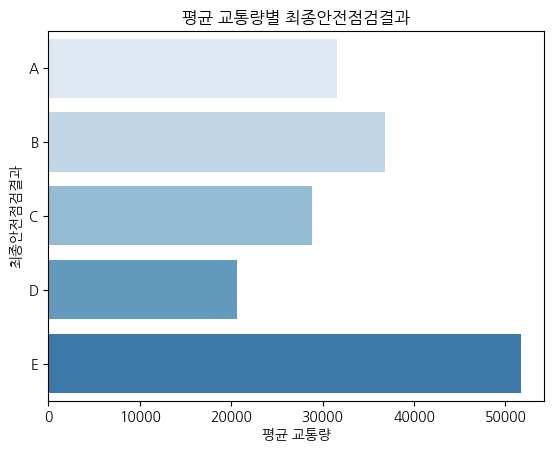

In [44]:
# 막대그래프

avg_traffic = df2[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).mean()

sns.set_palette("Blues")
sns.barplot(x='교통량', y='최종안전점검결과', data=avg_traffic)
plt.title('평균 교통량별 최종안전점검결과')
plt.xlabel('평균 교통량')
plt.show()